# Computer Vision and Image Processing - Take Home Assignment 01

---

| Field | Details |
|-------|---------|
| **Registration Number** | `EG/2020/4113` |
| **Name** | Perera K.R.D |
| **Repository** | [📁 GitHub Repository](https://github.com/PereraKRD/Computer_Vision_and_Image_Processing_Take_Home_01.git) |

---

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Take Home Assignment 1 - Task 1

In [3]:
def reduce_intensity_levels(image, levels):
    assert (levels & (levels - 1) == 0) and levels <= 256, "Levels must be power of 2 and <= 256"
    factor = 256 // levels
    reduced_img = (image // factor) * factor
    return reduced_img

In [4]:
# Load the image
img_path = os.path.join("..", "Images", "task_01", "01.jpg")
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if original_img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

In [5]:
# Intensity level variable initialization
desired_levels = 4

In [6]:
# Process image
reduced_img = reduce_intensity_levels(original_img, desired_levels)

# Create output directory if it doesn't exist
output_dir = os.path.join("..", "Results", "task_01")
os.makedirs(output_dir, exist_ok=True)

In [7]:
# Save the processed image
output_path = os.path.join(output_dir, f"reduced_{desired_levels}_levels.png")
cv2.imwrite(output_path, reduced_img)

True

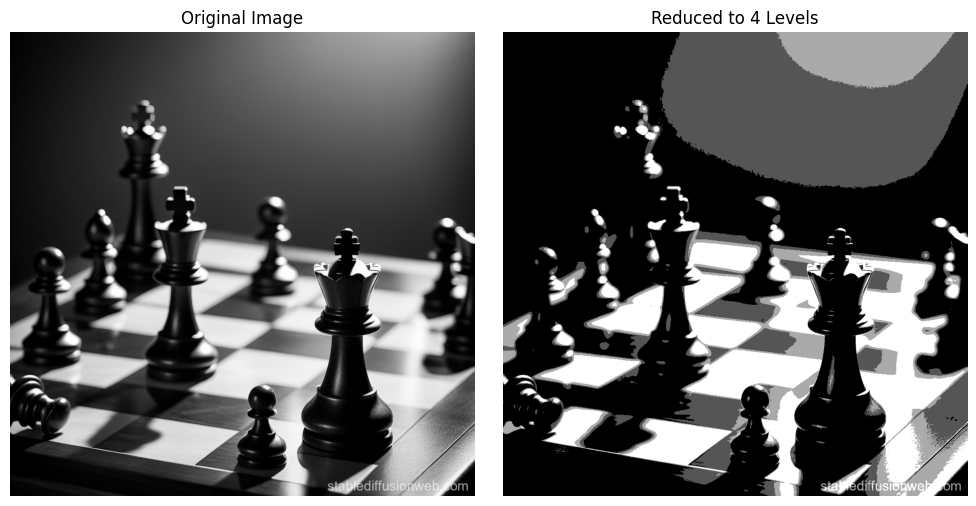

Intensity reduction process complete!
Original dimensions: 1024×1024 pixels
Intensity levels reduced: 256 → 4 levels
Output file saved to: ../Results/task_01/reduced_4_levels.png


In [8]:
# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Reduced to {desired_levels} Levels")
plt.imshow(reduced_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Intensity reduction process complete!")
print(f"Original dimensions: {original_img.shape[1]}×{original_img.shape[0]} pixels")
print(f"Intensity levels reduced: 256 → {desired_levels} levels")
print(f"Output file saved to: {output_path}")

# Take Home Assignment 1 - Task 2

In [9]:
def apply_mean_filter(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

In [10]:
# Load image in grayscale
image_path = os.path.join("..", "Images", "task_02", "02.jpg")
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

In [11]:
# Apply averaging filters with different kernel sizes
filtered_3x3 = apply_mean_filter(original_image, 3)
filtered_10x10 = apply_mean_filter(original_image, 10)
filtered_20x20 = apply_mean_filter(original_image, 20)

In [12]:
# Prepare data for visualization
image_titles = ['Original Image', '3×3 Avg Filter', '10×10 Avg Filter', '20×20 Avg Filter']
processed_images = [original_image, filtered_3x3, filtered_10x10, filtered_20x20]

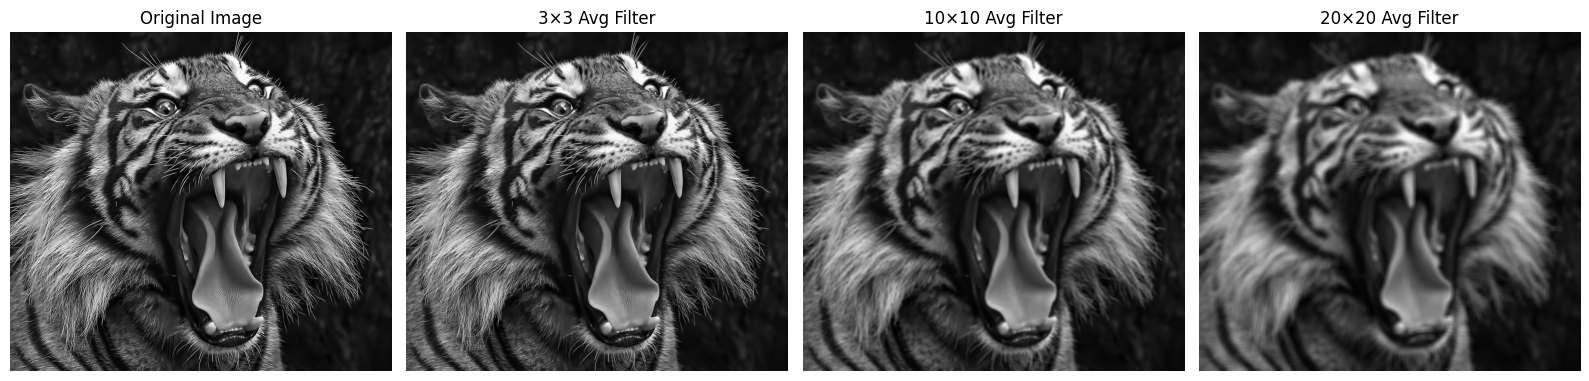

Spatial averaging process complete!
Original dimensions: 1440×1280 pixels

Kernel sizes applied:
  → 3×3 avg filter (light)
  → 10×10 avg filter (moderate)
  → 20×20 avg filter (heavy)
Output files saved to: ../Results/task_02


In [13]:
# Display the results
plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(image_titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Create output directory and save results
results_directory = os.path.join("..", "Results", "task_02")
os.makedirs(results_directory, exist_ok=True)

# Save smoothed images
cv2.imwrite(os.path.join(results_directory, "3x3_kernel.png"), filtered_3x3)
cv2.imwrite(os.path.join(results_directory, "10x10_kernel.png"), filtered_10x10)
cv2.imwrite(os.path.join(results_directory, "20x20_kernel.png"), filtered_20x20)

print("Spatial averaging process complete!")
print(f"Original dimensions: {original_image.shape[1]}×{original_image.shape[0]} pixels")
print("\nKernel sizes applied:")
print("  → 3×3 avg filter (light)")
print("  → 10×10 avg filter (moderate)")
print("  → 20×20 avg filter (heavy)")
print(f"Output files saved to: {results_directory}")

# Take Home Assignment 1 - Task 3

In [14]:
def rotate_image(image, rotation_angle):
    image_height, image_width = image.shape
    center_point = (image_width // 2, image_height // 2)
    
    # Compute rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center_point, rotation_angle, scale=1.0)
    
    # Compute the new bounding dimensions of the image
    cos_angle = np.abs(rotation_matrix[0, 0])
    sin_angle = np.abs(rotation_matrix[0, 1])
    new_width = int((image_height * sin_angle) + (image_width * cos_angle))
    new_height = int((image_height * cos_angle) + (image_width * sin_angle))
    
    # Adjust the rotation matrix to take into account translation
    rotation_matrix[0, 2] += (new_width / 2) - center_point[0]
    rotation_matrix[1, 2] += (new_height / 2) - center_point[1]
    
    # Rotate the image with white background
    rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height), borderValue=255)
    return rotated_image

In [15]:
# Load image (grayscale for simplicity)
input_image_path = os.path.join("..", "Images", "task_03", "03.jpg")
original_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

In [16]:
# Rotate images by specified angles
image_rotated_45 = rotate_image(original_image, -45)
image_rotated_90 = rotate_image(original_image, -90)

In [17]:
# Prepare data for visualization
display_titles = ['Original Image', 'Rotated 45°', 'Rotated 90°']
display_images = [original_image, image_rotated_45, image_rotated_90]

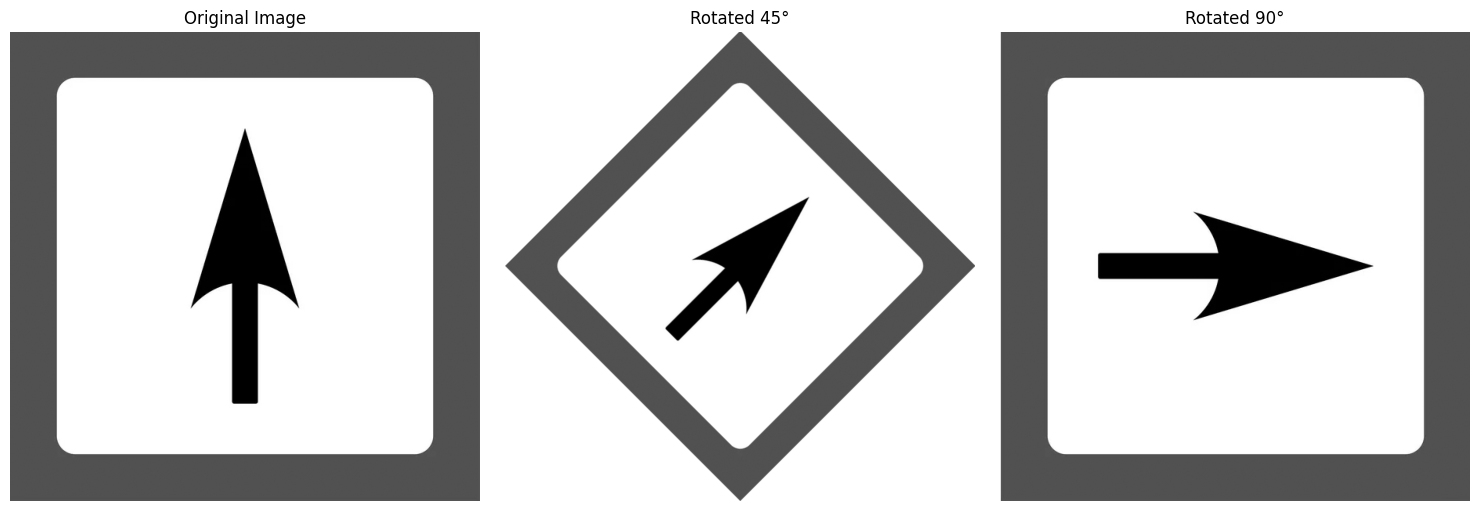

Rotation processing complete!
Original dimensions: 600×600 pixels
45° rotation result: 848×848 pixels
90° rotation result: 600×600 pixels

Transformations applied:
  → 45° counter-clockwise rotation
  → 90° counter-clockwise rotation
Output files saved to: ../Results/task_03


In [18]:
# Display results
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(display_images[i], cmap='gray')
    plt.title(display_titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Create output directory and save results
output_directory = os.path.join("..", "Results", "task_03")
os.makedirs(output_directory, exist_ok=True)

# Save transformed images
cv2.imwrite(os.path.join(output_directory, "transform_45deg.png"), image_rotated_45)
cv2.imwrite(os.path.join(output_directory, "transform_90deg.png"), image_rotated_90)

print("Rotation processing complete!")
print(f"Original dimensions: {original_image.shape[1]}×{original_image.shape[0]} pixels")
print(f"45° rotation result: {image_rotated_45.shape[1]}×{image_rotated_45.shape[0]} pixels")
print(f"90° rotation result: {image_rotated_90.shape[1]}×{image_rotated_90.shape[0]} pixels")
print("\nTransformations applied:")
print("  → 45° counter-clockwise rotation")
print("  → 90° counter-clockwise rotation")
print(f"Output files saved to: {output_directory}")

# Take Home Assignment 1 - Task 4

In [19]:
def block_average(input_image, block_size):
    image_height, image_width = input_image.shape
    averaged_image = input_image.copy()
    
    # Process non-overlapping blocks
    for row in range(0, image_height - image_height % block_size, block_size):
        for col in range(0, image_width - image_width % block_size, block_size):
            # Extract current block
            current_block = input_image[row:row + block_size, col:col + block_size]
            
            # Calculate average value of the block
            block_average_value = np.mean(current_block, dtype=np.float32)
            
            # Replace all pixels in the block with the average value
            averaged_image[row:row + block_size, col:col + block_size] = int(block_average_value)
    
    return averaged_image

In [20]:
# Load grayscale image
input_image_path = os.path.join("..", "Images", "task_04", "04.jpg")
original_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

In [21]:
# Apply block averaging for different block sizes
block_averaged_3x3 = block_average(original_image, 3)
block_averaged_5x5 = block_average(original_image, 5)
block_averaged_7x7 = block_average(original_image, 7)

In [22]:
# Prepare data for visualization
display_titles = ['Original Image', '3×3 Spatial Reduction', '5×5 Spatial Reduction', '7×7 Spatial Reduction']
processed_images = [original_image, block_averaged_3x3, block_averaged_5x5, block_averaged_7x7]

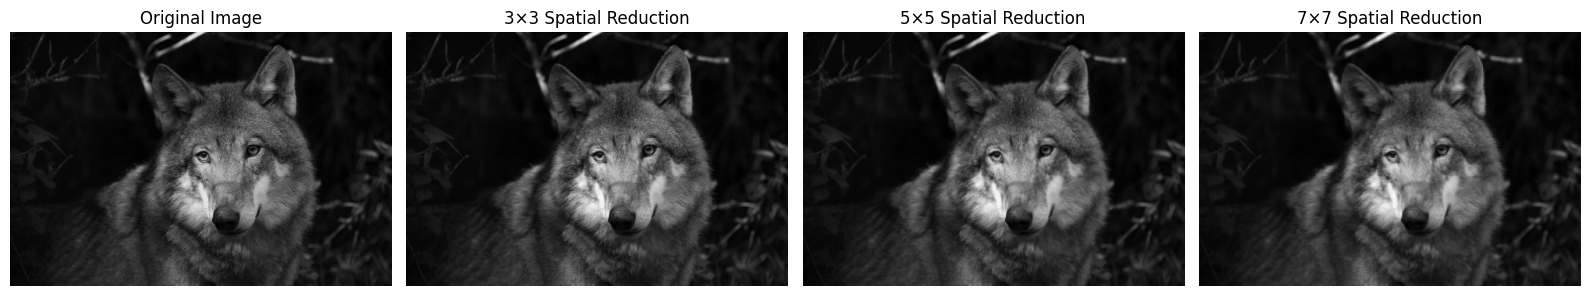

Spatial resolution reduction process complete!
Input image dimensions: 1920x1280 pixels

Block sizes processed:
  → 3x3 pixel blocks
  → 5x5 pixel blocks
  → 7x7 pixel blocks
Output files saved to: ../Results/task_04

Resolution reduction analysis:
Total original pixels: 2,457,600
3x3 averaging: ~273,066 effective pixels (9x reduction)
5x5 averaging: ~98,304 effective pixels (25x reduction)
7x7 averaging: ~50,155 effective pixels (49x reduction)


In [23]:
# Display the results
plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(display_titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Create output directory and save results
output_directory = os.path.join("..", "Results", "task_04")
os.makedirs(output_directory, exist_ok=True)

# Save processed images with block averaging
cv2.imwrite(os.path.join(output_directory, "spatial_reduced_3x3.png"), block_averaged_3x3)
cv2.imwrite(os.path.join(output_directory, "spatial_reduced_5x5.png"), block_averaged_5x5)
cv2.imwrite(os.path.join(output_directory, "spatial_reduced_7x7.png"), block_averaged_7x7)

print("Spatial resolution reduction process complete!")
print(f"Input image dimensions: {original_image.shape[1]}x{original_image.shape[0]} pixels")
print("\nBlock sizes processed:")
print("  → 3x3 pixel blocks")
print("  → 5x5 pixel blocks") 
print("  → 7x7 pixel blocks")
print(f"Output files saved to: {output_directory}")

# Display resolution reduction statistics
total_pixels = original_image.shape[0] * original_image.shape[1]
print(f"\nResolution reduction analysis:")
print(f"Total original pixels: {total_pixels:,}")
print(f"3x3 averaging: ~{total_pixels//9:,} effective pixels (9x reduction)")
print(f"5x5 averaging: ~{total_pixels//25:,} effective pixels (25x reduction)")
print(f"7x7 averaging: ~{total_pixels//49:,} effective pixels (49x reduction)")